<div style="text-align: center;">
<FONT size="8">
<BR><BR><b>
Stochastic Processes: <BR><BR>Data Analysis and Computer Simulation  
</b>
</FONT>
<BR><BR><BR>

<FONT size="7">
<b>
Brownian motion 2: computer simulation
</b>
</FONT> 
<BR><BR><BR>

<FONT size="7">
<b>
-Python code to simulate Brownian motion-
</b>
</FONT>
<BR>
</div>

#### Note 1

- In this lesson, we will try to simulate the dynamics of a Brownian particle undergoing random thermal fluctuations, as dictated by the Langevin Equation.
- Today, we will write a python code that is as simple as possible, just enough to produce the time evolution of the particle.

# Equations to be solved

## Difference equations

\begin{equation}
\mathbf{R}_{i+1}=\mathbf{R}_i+\mathbf{V}_i \Delta t 
\tag{F5}
\end{equation}

$$
\mathbf{V}_{i+1}=
\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i + \frac{1}{m} \color{black}{\Delta \mathbf{W}_i} 
\tag{F9}
$$

## Random force

\begin{equation}
\langle \Delta \mathbf{W}_i\rangle=\mathbf{0} 
\tag{F10}
\end{equation}

\begin{equation}
\langle \Delta \mathbf{W}_i\Delta \mathbf{W}_j\rangle = {2k_B T\zeta}\Delta t\mathbf{I}\delta_{ij}  
\tag{F11}
\end{equation}

## Initial condition

$$
\mathbf{R}_0=0,\ \ \ \ \mathbf{V}_0=0\tag{F12}
$$

#### Note 2

- In the previous lesson, we learned how to properly discretize the Langevin equation to perform a numerical integration of the equations of motion for a Brownian particle.
- In particular, we discussed that a naive application of Euler's method is not suitable. We must treat the random force term with special care.
- This is done by considering the cumulative impulse felt by the particle as a Wiener process. 
- Thus, the time evolution of the position and velocity of a given particle can be updated through Eqs. (F5) and (F9). Where $R_i$ and $V_i$ denote the position and velocity at the i-th time step, and $\Delta t$ is the time interval used for the integration.
- The effect of the random fluctuations is included as the update of the Wiener process over this time interval, $\Delta W_i$.
- This random process is described by a Gaussian random variable with zero mean and delta correlations in time and space, as given by Eqs. (F10) and (F11).
- Finally, the only remaining information we need to start the simulation is to specify the initial conditions, that is, the position and velocity of the particles at time zero defined in Eq.(F12).

# A simple simulation code

## Import libraries

In [1]:
% matplotlib nbagg
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt 
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from `mpl_toolkits.mplot3d`
plt.style.use('ggplot') # use "ggplot" style for graphs

#### Note 3

- So now, let us use Python to write a program for performing simulations of Brownian particles.
- As always, we begin by importing the necessary numerical and plotting libraries.
- In this plot, since we want to draw the trajectories of Brownian particles, which are evolving in 3D, we will use `matplotlib` with `nbagg` option and `mplot3d` module.
- The other libraries and commands have already been introduced and used before.

## Define parameters and initialize variables

In [2]:
dim  = 3 # system dimension (x,y,z)
nump = 100 # number of independent Brownian particles to simulate 
nums = 1024 # number of simulation steps
dt   = 0.05 # set time increment, \Delta t
zeta = 1.0 # set friction constant, \zeta
m    = 1.0 # set particle mass, m
kBT  = 1.0 # set temperatute, k_B T
std  = np.sqrt(2*kBT*zeta*dt) # calculate std for \Delta W via Eq.(F11)
np.random.seed(0) # initialize random number generator with a seed=0
R = np.zeros([nump,dim]) # array to store current positions and set initial condition Eq.(F12)
V = np.zeros([nump,dim]) # array to store current velocities and set initial condition Eq.(F12)
W = np.zeros([nump,dim]) # array to store current random forcces
Rs = np.zeros([nums,nump,dim]) # array to store positions at all steps
Vs = np.zeros([nums,nump,dim]) # array to store velocities at all steps
Ws = np.zeros([nums,nump,dim]) # array to store random forces at all steps
time = np.zeros([nums]) # an array to store time at all steps

#### Note 4

- Here we specify the parameters of our simulation.
- We will work in 3 dimensions, x, y, and z, and consider the dynamics of one hundred non-interacting Brownian particles.
- We set the number of simulations steps to 1024, with a time step of $\Delta t = 0.05$ in simulation units.
- You can change the number of steps, but for later purposes, please keep it as some power-of-two.
- Without loss of generality, we can set the friction constant $\zeta$, particle mass $m$, and thermal energy $K_B T$ equal to unity.
- For simplicity, we compute one additional constant, "std" which gives the amplitude of the variance of the cumulative impulse, as defined in Eq. (F11).
- After initializing the random number generator, we create and initialize all the arrays needed for the simulation.
- R,V,W are the current position, velocity, and random forcing term at the current time step.
- Rs,Vs,Ws are the positions, velocities, and random forcing terms for the whole trajectory.
- Time is just an array with the time values for each step

## Perform simulation

In [3]:
for i in range(nums): # repeat the following operations from i=0 to nums-1
    W = std*np.random.randn(nump,dim) # generate an array of random forces accordingly to Eqs.(F10) and (F11)
    V = V*(1-zeta/m*dt)+W/m # update velocity via Eq.(F9)
    R = R + V*dt # update position via Eq.(F5)
    Rs[i,:,:]=R # accumulate particle positions at each step in an array Rs
    Vs[i,:,:]=V # accumulate particle velocitys at each step in an array Vs
    Ws[i,:,:]=W # accumulate random forces at each step in an array Ws
    time[i]=i*dt # store time in each step in an array time

#### Note 5

- The main part of the present code example is shown here.
- To perform the simulation, we repeatedly solve for the position, and velocities, according to equations (F5) and (F9).
- This is achieved by using a for loop from i=0 to nums-1.
- For each iteration of the for loop we use the current position, velocity and random force to update the particle configuration.
- Notice that the random forces, for each particle and spatial direction, are drawn from a Gaussian distribution with standard deviation given by "std".
- After computing the current position and velocity using Eqs.(F5) and (F9), we make sure to save the values in the arrays Rs,Vs, and Ws to accumulate all past values for the data analysis we will perform later.

## Plot trajectories of particles on a 2D plane

- Plot the temporal particle positions $R_x(t),R_y(t),R_z(t)$ in the x-y plane.

<IPython.core.display.Javascript object>


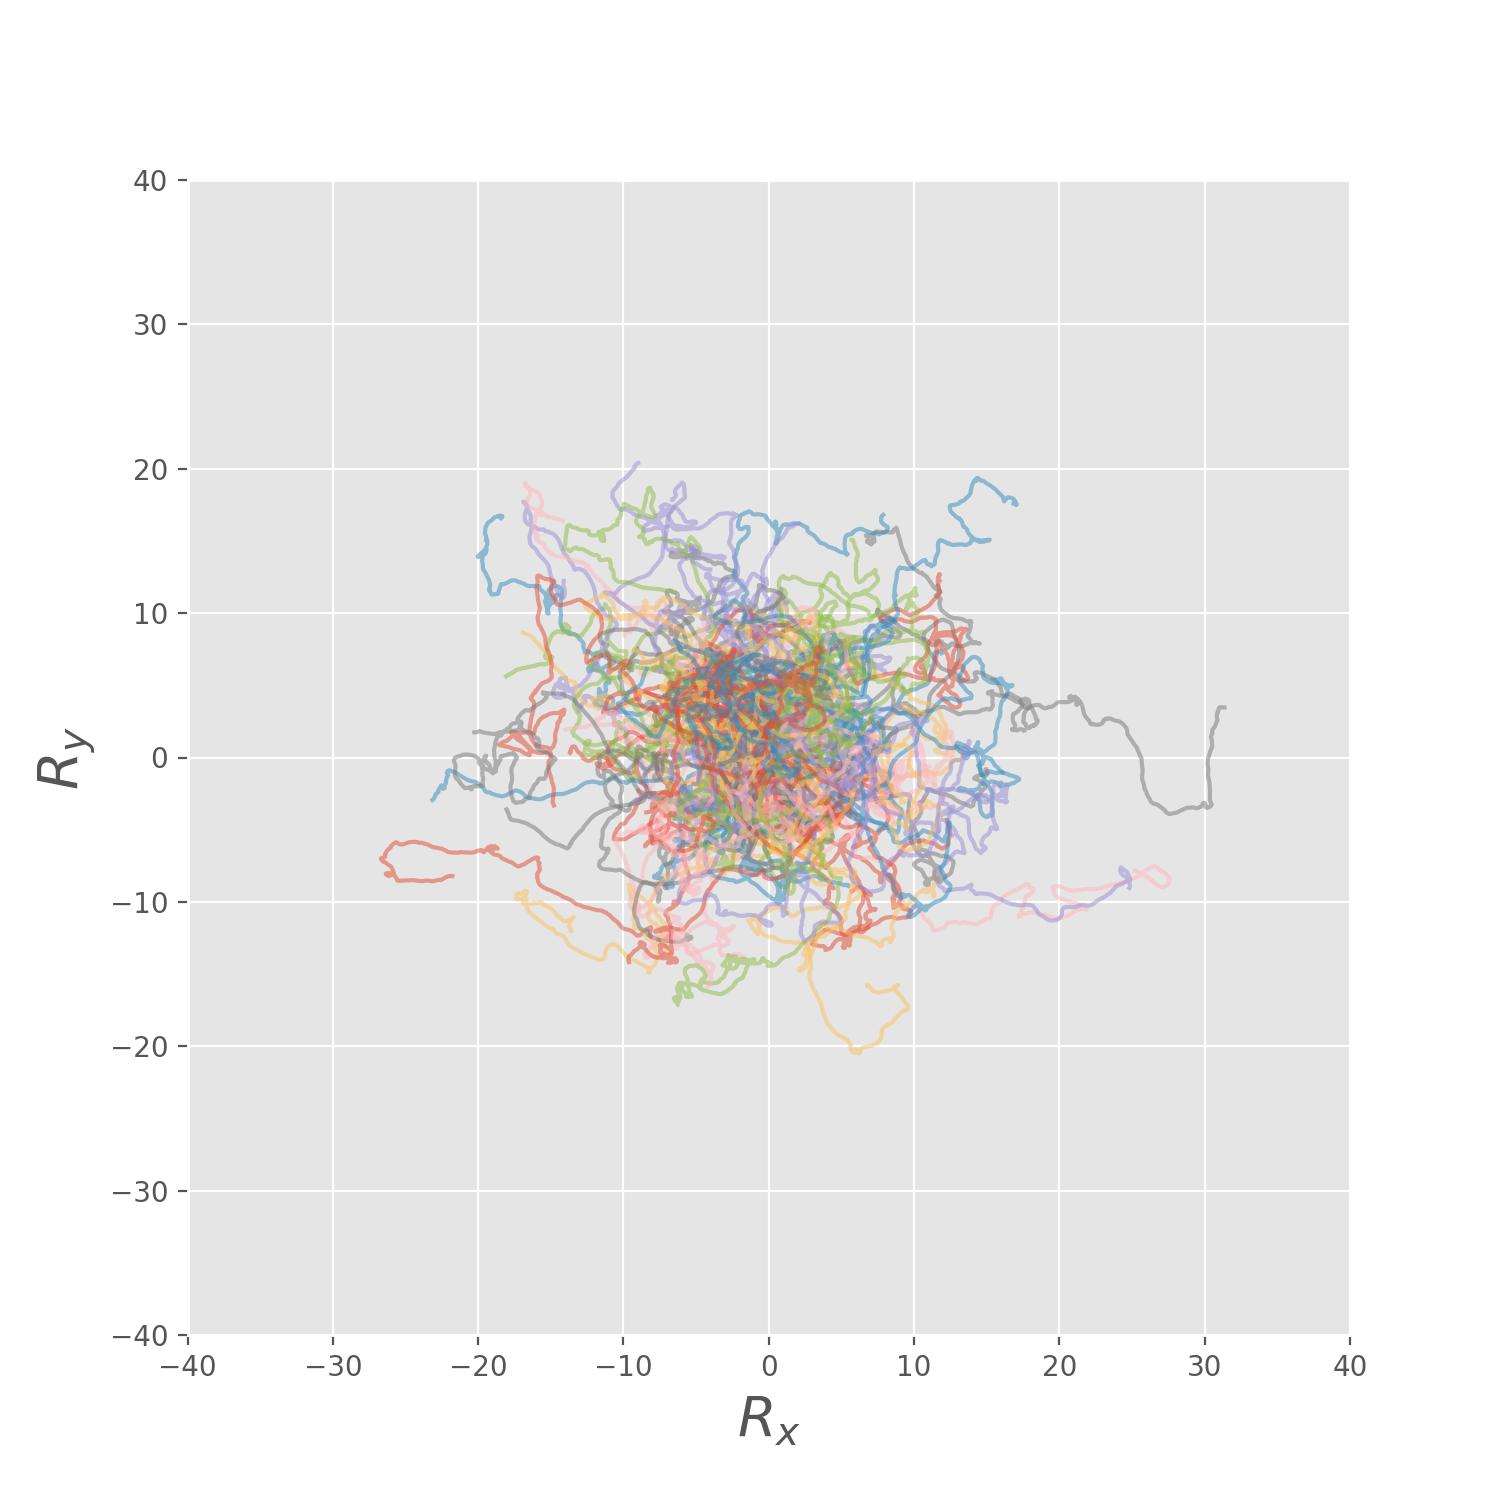

In [4]:
box=80. # set draw area as box^2
fig, ax = plt.subplots(figsize=(7.5,7.5)) # set fig with its size 7.5 x 7.5 inch
ax.set_xlabel(r"$R_x$", fontsize=20) # set x-label
ax.set_ylabel(r"$R_y$", fontsize=20) # set y-label
plt.xlim(-box/2,box/2) # set x-range
plt.ylim(-box/2,box/2) # set y-range
for n in range(nump): # repeat from n=0 to nump-1
    ax.plot(Rs[:,n,0],Rs[:,n,1],alpha=0.5) # plot trajectiries of all particles
plt.show() # draw plots

#### Note 6

- Let us now visualize the simulation data just obtained.
- By definition, the particles all exhibit Brownian motion along the x,y, and z directions, independently.
- To easily visualize this motion, we first Plot the trajectories of all `nump` particles in the x-y plane.
- Let us run the code example shown here.
- While the motions along the z-axis are not visible in this plot, you may examine them by plotting trajectories in the x-z or y-z planes as well.
- Notice how the density of the trajectories shows spherical symmetry, and is highest at the origin, where the particles were initially located.

## Plot trajectories of particles in 3D space

- Plot the temporal particle positions $R_x(t),R_y(t),R_z(t)$ in 3D space.

<IPython.core.display.Javascript object>


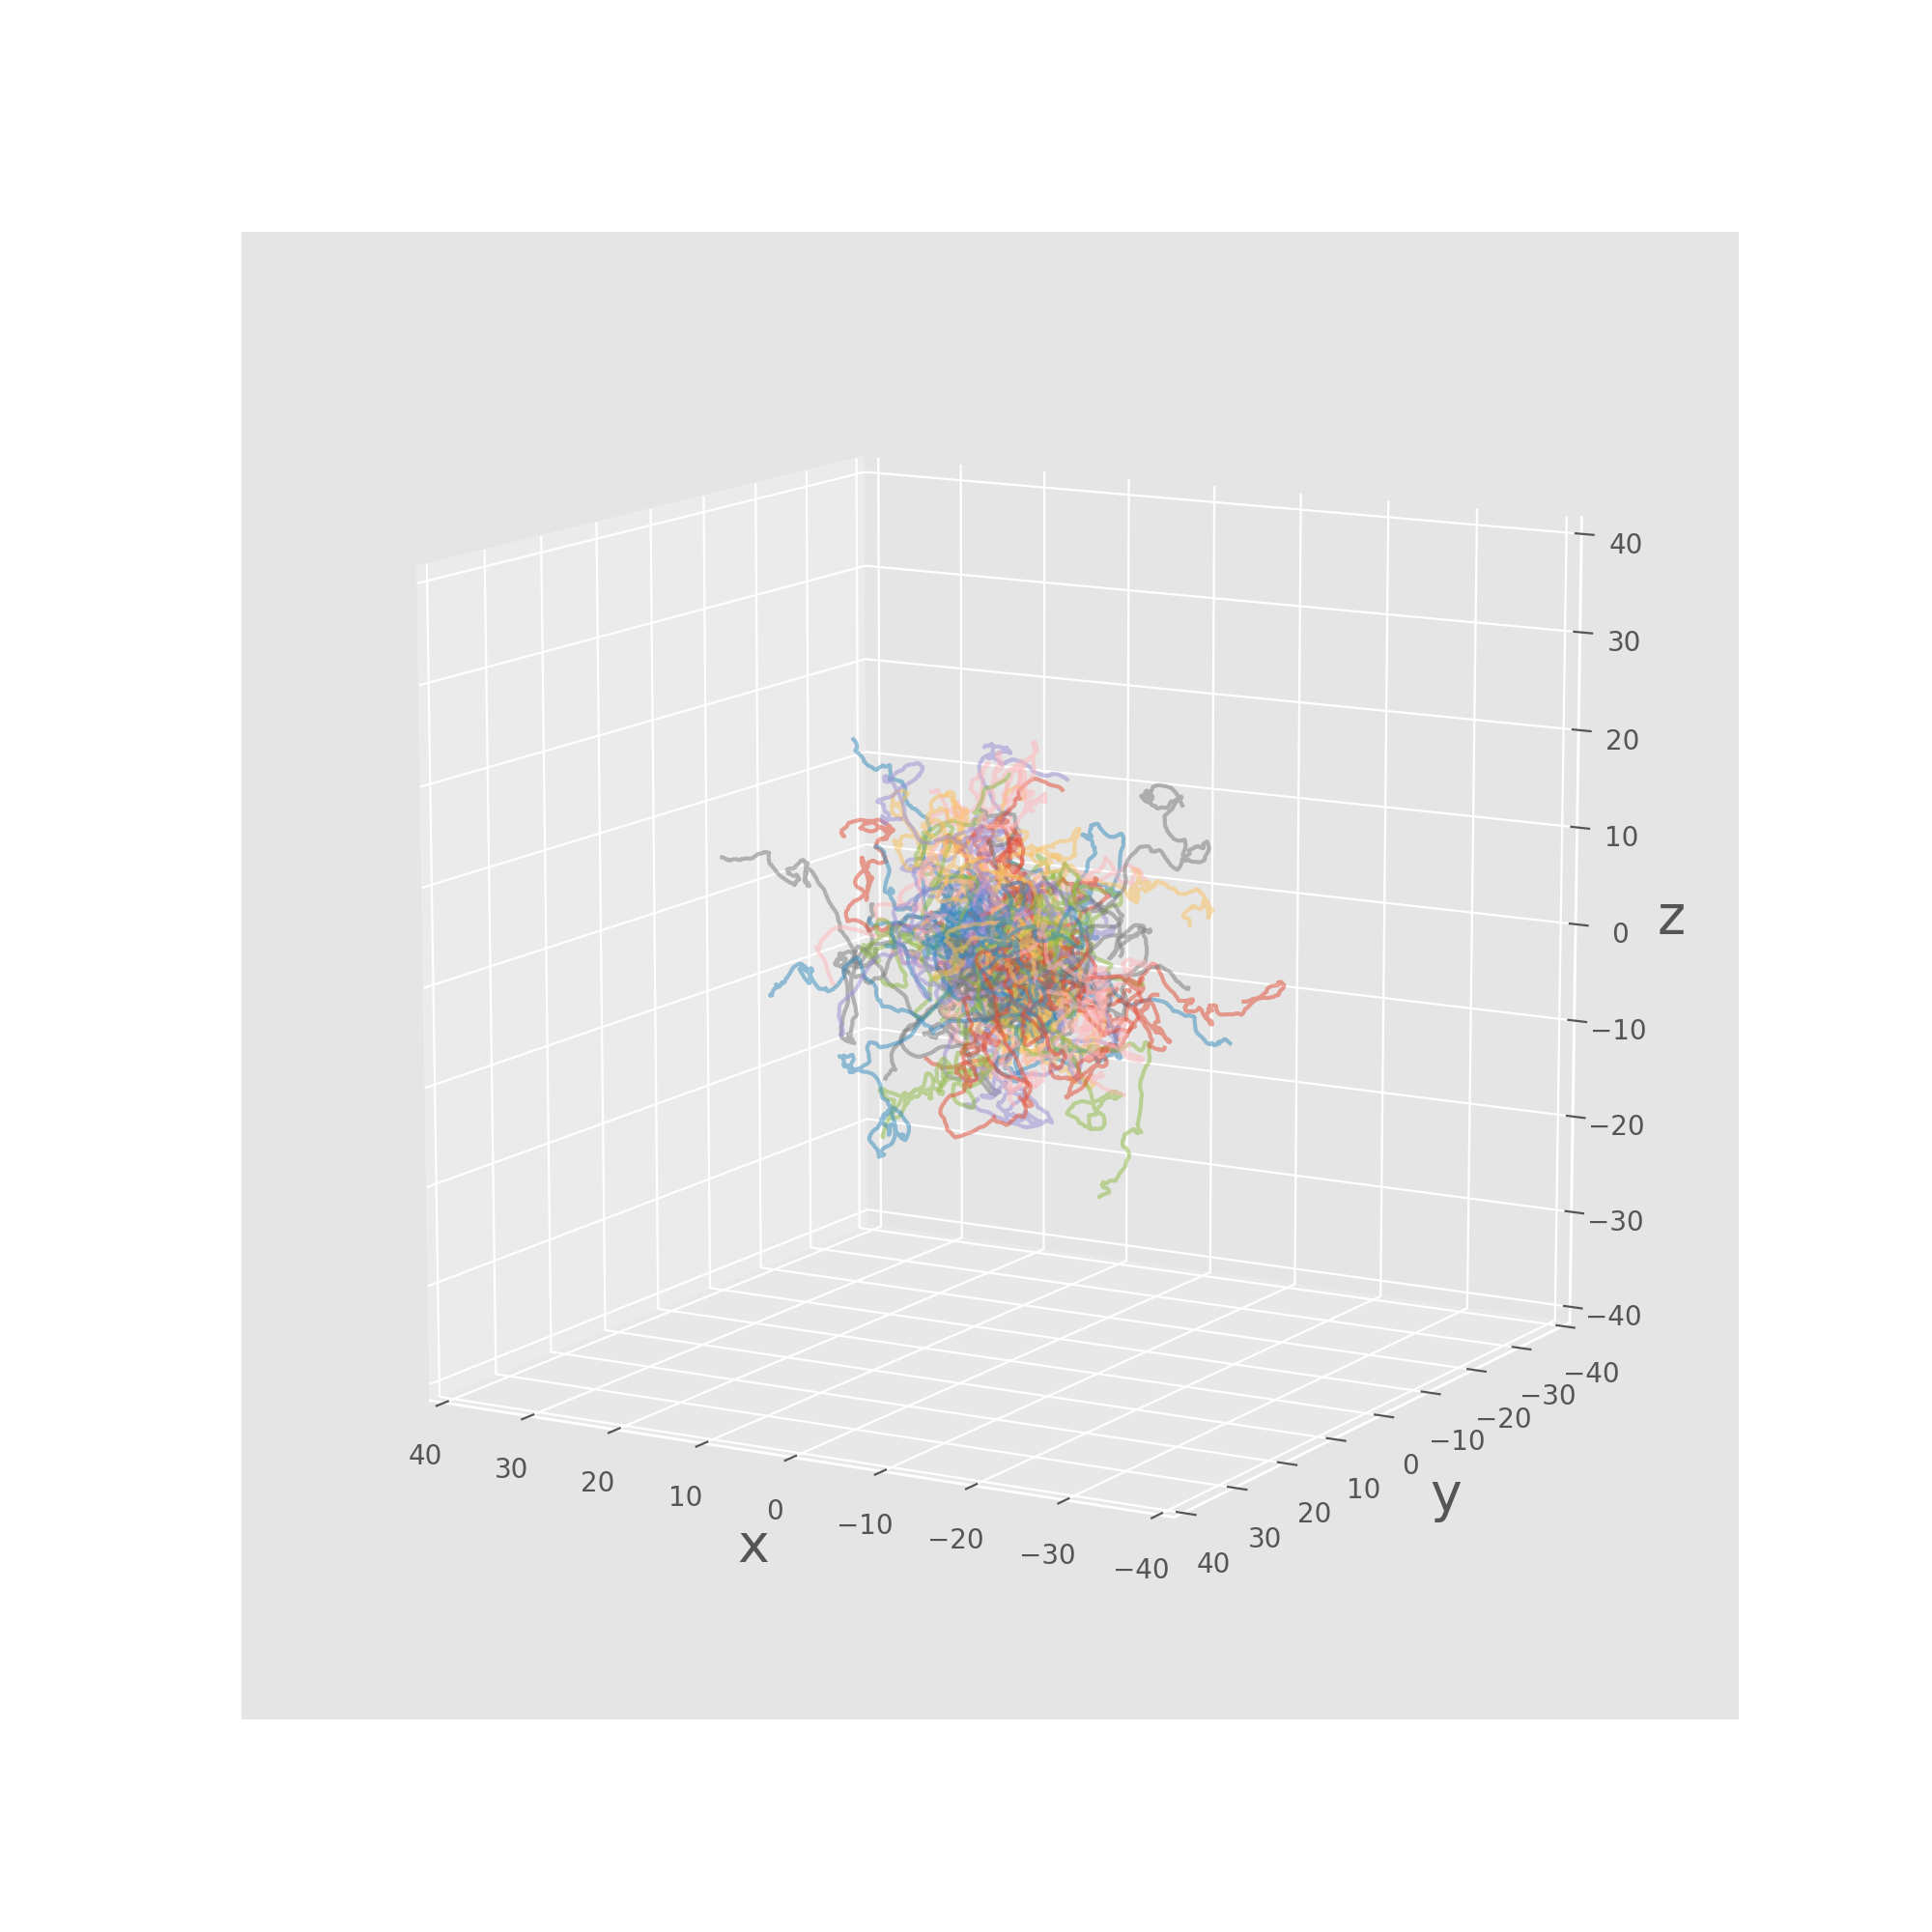

In [5]:
box=80. # set draw area as box^3
fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 2D axes
ax.set_xlim(-box/2,box/2) # set x-range
ax.set_ylim(-box/2,box/2) # set y-range
ax.set_zlim(-box/2,box/2) # set z-range
ax.set_xlabel(r"x",fontsize=20) # set x-label
ax.set_ylabel(r"y",fontsize=20) # set y-label
ax.set_zlabel(r"z",fontsize=20) # set z-label
ax.view_init(elev=12,azim=120) # set view point
for n in range(nump): # repeat from n=0 to nump-1
    ax.plot(Rs[:,n,0],Rs[:,n,1],Rs[:,n,2],alpha=0.5) # plot trajectiries of all particle
plt.show() # draw plots

#### Note 7

- In quite many situations, it is useful to visualize stereoscopic information in quasi 3D space on a screen.
- The bottleneck is that such 3D graphics usually require more detailed knowledge and computer programming skills.
- The Jupyter notebook, however, allows us to perform this task in an extremely easy way.
- This is a code example to plot the trajectories of all the particles in 3D space.
- If you run this, you will see the full 3D trajectories.
- As you may notice, the difference from the previous 2D plot is rather small.
- In the 2nd line, only the use of the `fig.add_subplot` command with the `projection='3d'` keyword creates an additional axis to the standard 2D axes.
- And the `ax.view_init` command on the 10th line defines the initial view point of the camera, but the remaining part is the same as for creating the 2D plot.
- By clicking and dragging on the graph, you can pan and rotate the camera to look at the trajectories from different angles.
- Through a careful examinations of this 3D plot, you should be convinced about the spherical symmetry of the resulting trajectories centered at the origin.

## Homework

- Perform a simulation for a single Brownian particle (nump=1) and plot its trajectory on the x-y, x-z, and y-z planes.

- Repeat the same procedure as above, but modify `np.random.seed(0)` to `np.random.seed(1)`.

- Perform simulations for 100 Brownian particles (nump=100) and plot its trajectories in 3D space.

